In [42]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import quandl

In [43]:
%matplotlib inline

In [52]:
data = quandl.get('WIKI/GOOGL')

In [53]:
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [54]:
data1=data[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [55]:
data1.tail()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0
2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0
2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0
2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0
2018-03-27,1063.90,1064.54,997.62,1006.94,2940957.0


In [56]:
data2=data1.reset_index()

In [57]:
data2.head()

,Date,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
1,2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2,2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
3,2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
4,2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [58]:
data2.tail()

,Date,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
3419,2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0
3420,2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0
3421,2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0
3422,2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0
3423,2018-03-27,1063.90,1064.54,997.62,1006.94,2940957.0


In [59]:
data3 = data2.rename(columns={'Date': 'ds'})
data3 = data3.rename(columns={'Adj. Close': 'y'})

In [61]:
data3.tail()

,ds,Adj. Open,Adj. High,Adj. Low,y,Adj. Volume
3419,2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0
3420,2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0
3421,2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0
3422,2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0
3423,2018-03-27,1063.90,1064.54,997.62,1006.94,2940957.0


In [62]:
data_for_pr1=data3[['ds','y']]

In [63]:
data_for_pr2=data3

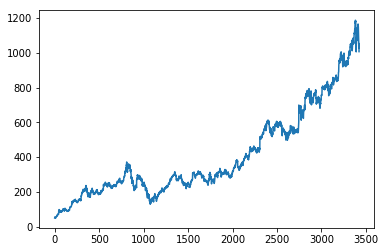

In [64]:
data_for_pr1['y'].plot()

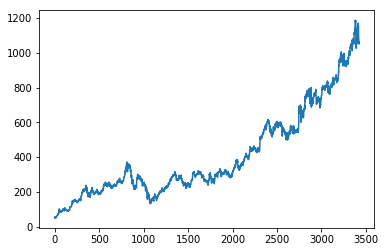

In [65]:
data2['Adj. Open'].plot()

In [66]:
## create the prphet object
m=Prophet()

In [67]:
m.fit(data_for_pr1)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [68]:
future = m.make_future_dataframe(periods=365)

In [72]:
future.head()

,ds
0,2004-08-19
1,2004-08-20
2,2004-08-23
3,2004-08-24
4,2004-08-25


In [70]:
data2.tail()

,Date,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
3419,2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0
3420,2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0
3421,2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0
3422,2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0
3423,2018-03-27,1063.90,1064.54,997.62,1006.94,2940957.0


In [77]:
forecast = m.predict(future)

In [84]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2004-08-19,50.750623,50.750623,50.750623,7.720115,76.679075,-8.911146,-8.911146,-8.911146,0.0,0.0,0.0,0.115819,0.115819,0.115819,-9.026965,-9.026965,-9.026965,41.839477
1,2004-08-20,51.030454,51.030454,51.030454,8.281809,76.925719,-9.473819,-9.473819,-9.473819,0.0,0.0,0.0,0.000410,0.000410,0.000410,-9.474229,-9.474229,-9.474229,41.556635
2,2004-08-23,51.869946,51.869946,51.869946,9.339672,75.960235,-10.517972,-10.517972,-10.517972,0.0,0.0,0.0,0.143308,0.143308,0.143308,-10.661280,-10.661280,-10.661280,41.351973
3,2004-08-24,52.149776,52.149776,52.149776,10.017442,76.977127,-10.931450,-10.931450,-10.931450,0.0,0.0,0.0,0.062611,0.062611,0.062611,-10.994060,-10.994060,-10.994060,41.218326
4,2004-08-25,52.429607,52.429607,52.429607,9.826584,76.547380,-10.847299,-10.847299,-10.847299,0.0,0.0,0.0,0.442443,0.442443,0.442443,-11.289741,-11.289741,-11.289741,41.582308


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [79]:
forcast1=forecast[['ds', 'yhat']]

In [82]:
forcast1.head()

,ds,yhat
0,2004-08-19,41.839477
1,2004-08-20,41.556635
2,2004-08-23,41.351973
3,2004-08-24,41.218326
4,2004-08-25,41.582308


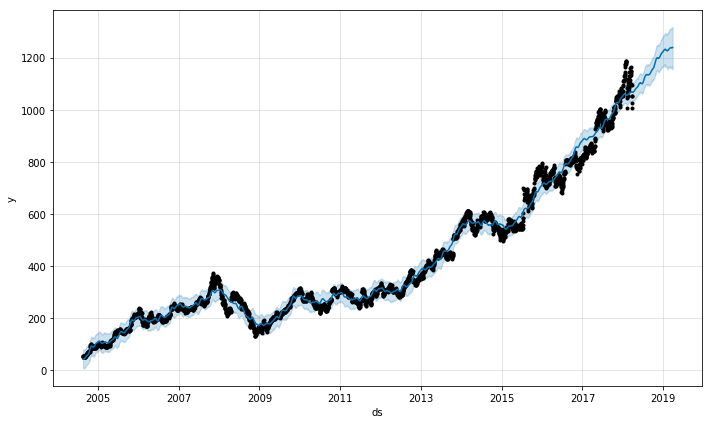

In [87]:
fig1 = m.plot(forecast)

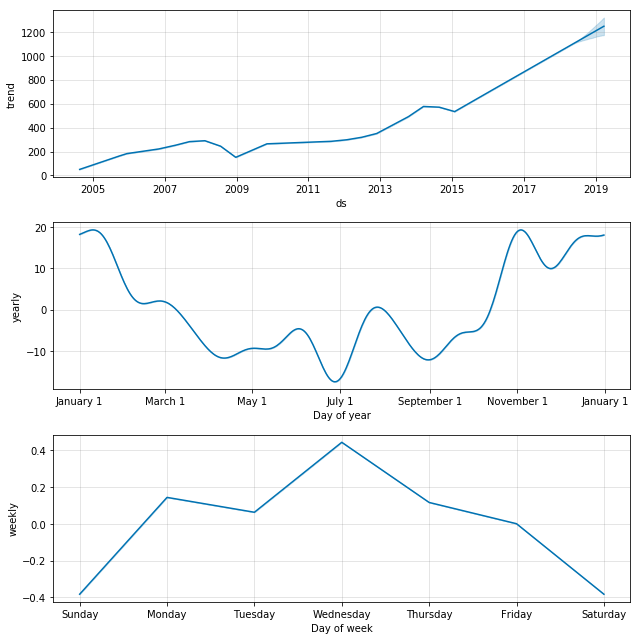

In [88]:
fig2 = m.plot_components(forecast)